# Storytelling Data Visualization of Euro Exchange Rates

This notebook investigates daily Euro exchange rates against a basket of foreign currencies from **4 Januray 1999** to **31 December 2020**.
The original CSV file, *euro-daily-hist-1999-2020.csv*, was downloaded from the European Central Bank (ECB) public repository in **January 2021**.

Exchange rate values represent the amount of foreign currency one euro colud purchase on the stated date.
For instance, an EUR-USD rate of $1.50$ indicates that one euro equalled $1.50$ US dollars on that day.

The dataset, curated by Daria Chemkeava, is periodically updated by the ECB. All numbers are expressed with **four-decimal precision** unless otherwise noted.

Link for database: https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020


In [2]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.head(5))

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [3]:
print(exchange_rates.tail(5))

     Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
5694   1999-01-08               1.8406              NaN               NaN   
5695   1999-01-07               1.8474              NaN               NaN   
5696   1999-01-06               1.8820              NaN               NaN   
5697   1999-01-05               1.8944              NaN               NaN   
5698   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
5694             1.7643         1.6138                      NaN   
5695             1.7602         1.6165                      NaN   
5696             1.7711         1.6116                      NaN   
5697             1.7965         1.6123                      NaN   
5698             1.8004         1.6168                      NaN   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
5694          0.58187          34.938          7.4433  .

## Importing the dataset

The CSV file is read with **pandas read_csv**, keeping default NA handling.

`exchange_rates.head()` and `exchange_rates.tail()` are displayed to validate the import and inspect both ends of the time series. 

In [4]:
print(exchange_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

# Exploratory Data Analysis

- **Shape:** 5699 rows × 41 currency columns
- **Temporal coverage:** 1999-01-04 -> 2020-12-31 (tradings days only)
- **Missing values:** Nulls appear irregularly across several currencies; gaps are most frequent in `Croatian kuna`, `Romanian leu` and `Turkish lira`.
- **Dtypes:** After initial import, most currency columns are `object` because "-" marks missing observations.

The subsequent steps rename key columns, convert the `Time` columns to `datetime`, sort chronologically, and reset the index to maintain sequential ordering.

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

## Column renaming and datetime conversion

* The ECB file encloses currency name is square brackets; extraneous charackters are removed for readability (`[US dollar ]` -> `US_dollar`).
* The column `Period\Unit:` is renamed `Time`, converted to `datetime64[ns]`, and sorted in ascending order to ensure proper temporal indexing.

In [6]:
euro_to_dollar = exchange_rates.loc[:, ['Time', 'US_dollar']]

In [7]:
euro_to_dollar['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
1.1869     1
1.1752     1
1.1770     1
1.1750     1
1.1821     1
Name: count, Length: 3528, dtype: int64

In [9]:
euro_to_dollar = euro_to_dollar[~(euro_to_dollar['US_dollar'] == '-')]
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

## Extracting the EUR -> USD time series

Only the `US_dollars` column is retained alongside `Time`.

Rows containing "-" are dopped, and the series is cast to `float64`.

This yields a clean, numeric vector ready for analysis.

In [10]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

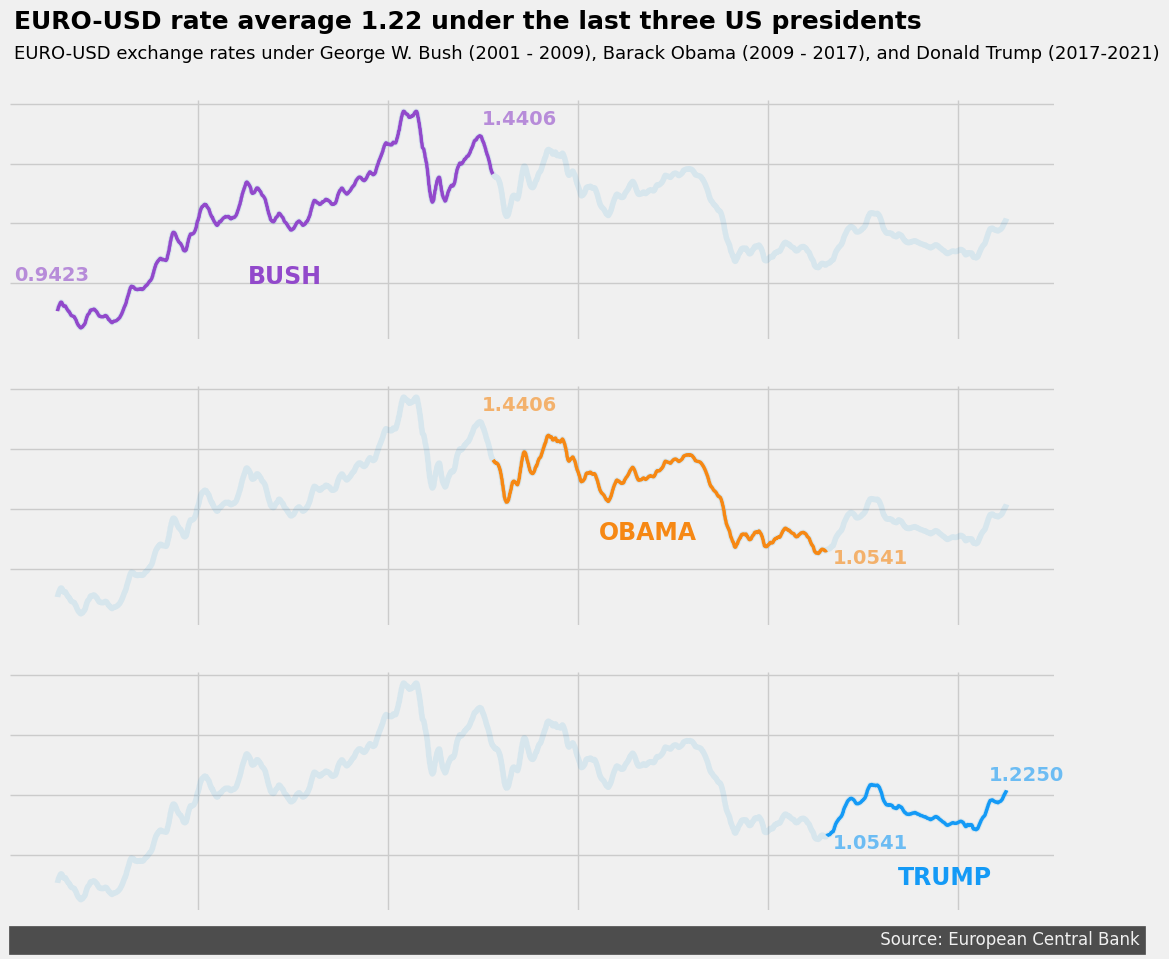

In [52]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 10))
for ax in axes:
    ax.plot(euro_to_dollar['Time'][521:], euro_to_dollar['rolling_mean'][521:], alpha=0.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(length=0)
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

axes[0].plot(euro_to_dollar['Time'][521:2868], euro_to_dollar['rolling_mean'][521:2868], color='#9249cb', linewidth=2.5)
axes[1].plot(euro_to_dollar['Time'][2867:4671], euro_to_dollar['rolling_mean'][2867:4671], color='#f68814', linewidth=2.5)
axes[2].plot(euro_to_dollar['Time'][4670:], euro_to_dollar['rolling_mean'][4670:], color='#149af6', linewidth=2.5)

axes[0].text(11000, 1.01, '0.9423', alpha=0.6, color='#9249cb', weight='bold')
axes[0].text(14600, 1.53, '1.4406', alpha=0.6, color='#9249cb', weight='bold')

axes[1].text(14600, 1.53, '1.4406', alpha=0.6, color='#f68814', weight='bold')
axes[1].text(17300, 1.02, '1.0541', alpha=0.6, color='#f68814', weight='bold')

axes[2].text(17300, 1.02, '1.0541', alpha=0.6, color='#149af6', weight='bold')
axes[2].text(18500, 1.25, '1.2250', alpha=0.6, color='#149af6', weight='bold')

axes[0].text(12800, 1, 'BUSH', fontsize=17, weight='bold', color='#9249cb')
axes[1].text(15500, 1.1, 'OBAMA', fontsize=17, weight='bold', color='#f68814')
axes[2].text(17800, 0.9, 'TRUMP', fontsize=17, weight='bold', color='#149af6')

axes[0].text(11000, 1.85, 'EURO-USD rate average 1.22 under the last three US presidents', weight='bold', fontsize=18)
axes[0].text(11000, 1.75, 'EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009 - 2017), and Donald Trump (2017-2021)', fontsize=13)

axes[2].text(11000, 0.7, ' '*165 + "Source: European Central Bank", color='#f0f0f0', backgroundcolor='#4d4d4d', fontsize=12)

plt.show()

## Plot styling

Plots adopt the **FiveThirtyEight** Matplotlib style for consistency with data-journalism aesthetics.

All figures share a 12 × 10 inch canvas; titles and axis labels employ sentence case for readability.